In [1]:
# Code to create the boundary mask files for AMM75
import xarray as xr
import sys

In [2]:
amm75_inputs_path = "/gws/nopw/j04/jmmp/jmmp_collab/AMM7/AMM75/INPUTS/"

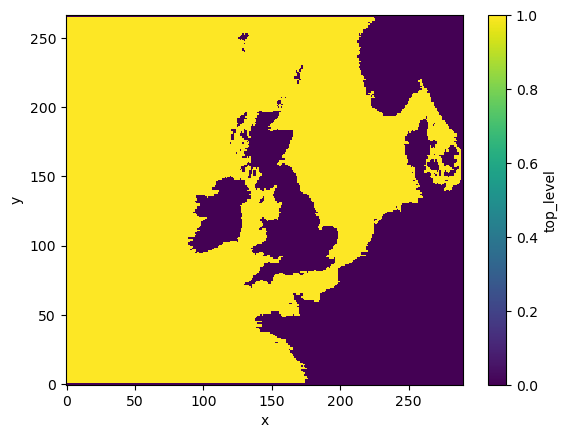

In [31]:
amm75_dom_ds = xr.open_dataset( amm75_inputs_path + "domain_cfg.nc" ).squeeze()
amm75_dom_ds.top_level[:,:].plot()

In [45]:
mask = amm75_dom_ds.top_level.copy()
mask[0,1:-1] = xr.where(amm75_dom_ds.top_level[1,1:-1]==1, -1, 0)
mask[-1,1:-1] = xr.where(amm75_dom_ds.top_level[-2,1:-1]==1, -1, 0)
mask[:,0] = xr.where(amm75_dom_ds.top_level[:,1]==1, -1, 0)
mask.name = "mask"
mask.to_netcdf("bdy_open_mask.nc")

mask = amm75_dom_ds.top_level.copy()
mask[:,-1] = xr.where(amm75_dom_ds.top_level[:,-2]==1, -1, 0)
baltic_mask_ds.mask[167:170,-1] = 0  # these points seem to cause problems when included
mask.name = "mask"
mask.to_netcdf("bdy_baltic_mask.nc")